In [5]:
#Research how US companies hire and apply for working visa for foreign workers. 
#Your objective is to find interesting patterns in given data.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [94]:
#1) What are the top 10 occupations for H1B visas with certified status?
visas = pd.read_csv("H1Bdisclosuredata.csv",encoding = 'latin1')
visas.head()

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_STATE,EMPLOYER_POSTAL_CODE,JOB_TITLE,SOC_CODE,SOC_NAME,NAICS_CODE,PREVAILING_WAGE
0,I-200-09209-039181,CERTIFIED,27-09-16,03-10-16,H-1B,01-10-16,20-09-19,CLOUDWICK TECHNOLOGIES INC.,CA,94560,HADOOP ADMINISTRATOR,15-1132,"SOFTWARE DEVELOPERS, APPLICATIONS",541511,102149
1,I-200-10138-949973,CERTIFIED-WITHDRAWN,11-03-16,28-11-16,H-1B,07-09-16,06-09-19,"WEST-CAMP PRESS, INC.",OH,43081,STAFF ACCOUNTANT,13-2011,ACCOUNTANTS AND AUDITORS,323119,45698
2,I-200-11045-306092,WITHDRAWN,05-12-16,05-12-16,H-1B,12-12-16,30-06-19,"FUTURETECH CONSULTANTS, L.L.C",GA,30092,PROGRAMMER ANALYST,15-1131,COMPUTER PROGRAMMERS,541511,60341
3,I-200-11080-460161,CERTIFIED-WITHDRAWN,03-02-15,31-10-16,H-1B,09-02-15,08-02-18,CONOCOPHILLIPS COMPANY,TX,77079,PETROPHYSICIST,19-4041,GEOLOGICAL AND PETROLEUM TECHNICIANS,324110,65520
4,I-200-12047-839355,CERTIFIED-WITHDRAWN,27-02-15,07-10-16,H-1B,29-08-15,28-08-18,"SUNERA TECHNOLOGIES, INC",MI,48083,PROGRAMMER ANALYST,15-1131,COMPUTER PROGRAMMERS,5415,68578


In [7]:
#Explore category options
visas.CASE_STATUS.unique()

array(['CERTIFIED', 'CERTIFIED-WITHDRAWN', 'WITHDRAWN', 'DENIED'],
      dtype=object)

In [8]:
#Count Number Rows
visas.CASE_NUMBER.count()

93533

In [9]:
#Create FILTER
certified_visas = visas[(visas.CASE_STATUS =="CERTIFIED")|(visas.CASE_STATUS == "CERTIFIED-WITHDRAWN")]

In [10]:
#Count number of rows for filter
certified_visas.CASE_NUMBER.count()

88974

In [11]:
#Find the number of unique occupations
len(certified_visas.SOC_NAME.unique())

491

In [12]:
cert_visas_grp_occ_1 = certified_visas[['SOC_CODE', 'SOC_NAME']]

In [13]:
cert_visas_grp_occ_2 = cert_visas_grp_occ_1.groupby('SOC_NAME').agg('count')

In [14]:
cert_visas_grp_occ_3 = cert_visas_grp_occ_2.sort_values(by='SOC_CODE', ascending=False)
#CAN ALSO COMBINE ALL THREE LINES INTO 1 COMMAND

In [15]:
cert_visas_grp_occ_3.head()

,SOC_CODE
SOC_NAME,
"SOFTWARE DEVELOPERS, APPLICATIONS",18369
COMPUTER SYSTEMS ANALYSTS,13866
COMPUTER PROGRAMMERS,11005
"COMPUTER OCCUPATIONS, ALL OTHER",7133
COMPUTER SYSTEMS ANALYST,3387


In [16]:
#TOP 10 OCCUPATIONS
cert_visas_grp_occ_3 = cert_visas_grp_occ_3.reset_index()

In [17]:
cert_visas_grp_occ_3.columns = ['Occupation', 'Quantity']

In [18]:
cert_visas_grp_occ_3[0:10]

,Occupation,Quantity
0,"SOFTWARE DEVELOPERS, APPLICATIONS",18369
1,COMPUTER SYSTEMS ANALYSTS,13866
2,COMPUTER PROGRAMMERS,11005
3,"COMPUTER OCCUPATIONS, ALL OTHER",7133
4,COMPUTER SYSTEMS ANALYST,3387
5,"SOFTWARE DEVELOPERS, SYSTEMS SOFTWARE",2814
6,MANAGEMENT ANALYSTS,1784
7,ACCOUNTANTS AND AUDITORS,1657
8,NETWORK AND COMPUTER SYSTEMS ADMINISTRATORS,1299
9,FINANCIAL ANALYSTS,1148


In [19]:
#2) Which company hires more data scientists?

In [20]:
datascience_visas = visas[['EMPLOYER_NAME','JOB_TITLE']][visas.JOB_TITLE =='DATA SCIENTIST'].groupby('EMPLOYER_NAME').agg('count').sort_values(by='JOB_TITLE', ascending=False)

In [21]:
datascience_visas.head()

,JOB_TITLE
EMPLOYER_NAME,
MICROSOFT CORPORATION,40
"FACEBOOK, INC.",12
"UBER TECHNOLOGIES, INC.",6
"THE NIELSEN COMPANY (US), LLC",4
SCHLUMBERGER TECHNOLOGY CORPORATION,4


In [22]:
#Reset the index and rename the columns
datascience_visas = datascience_visas.reset_index()
datascience_visas.columns = ['Company', 'Quantity']

In [23]:
#slice to get the first row of the dataset to answer the question
datascience_visas[0:1]

,Company,Quantity
0,MICROSOFT CORPORATION,40


In [26]:
#3) What is the average salary for data scientists? How it is compared to the mean of applications?
salary_visas = visas[['CASE_NUMBER','JOB_TITLE', 'PREVAILING_WAGE']]
salary_visas.head()

,CASE_NUMBER,JOB_TITLE,PREVAILING_WAGE
0,I-200-09209-039181,HADOOP ADMINISTRATOR,102149
1,I-200-10138-949973,STAFF ACCOUNTANT,45698
2,I-200-11045-306092,PROGRAMMER ANALYST,60341
3,I-200-11080-460161,PETROPHYSICIST,65520
4,I-200-12047-839355,PROGRAMMER ANALYST,68578


In [36]:
data_science_salary = np.mean(visas[visas.JOB_TITLE =='DATA SCIENTIST'].PREVAILING_WAGE)
print('The average salary of data scientists position is $ {:.2f}'.format(data_science_salary))

The average salary of data scienctist position is $ 88646.04


In [34]:
#determine salary of all positions and print value
all_positions_salary = visas['PREVAILING_WAGE'].mean()
print('The average salary of all positions is $ {:.2f}'.format(all_positions_salary))

The average salary of all positions is $ 75734.59


In [40]:
#Compare the two values
salary_diff = data_science_salary - all_positions_salary
salary_diff_percent = salary_diff/all_positions_salary*100
print('Data Scientists earn, on average, $ {:.2f} more. It represents {:.2f}% more than the average of all applications'.format(salary_diff, salary_diff_percent))

Data Scientists earn, on average, $ 12911.46 more. It represents 17.05% more than the average of all applications


In [41]:
#4) Which state has the higher deny proportionally to application. And proportionally to the population?
#upload states dataset
states = pd.read_csv("states population.csv")
states.head()

,State abbreviation,State,Population estimate
0,CA,California,39250017
1,TX,Texas,27862596
2,FL,Florida,20612439
3,NY,New York,19745289
4,PA,Pennsylvania,12802503


In [42]:
#Merge population data
visas_population = pd.merge(visas, states, left_on = 'EMPLOYER_STATE', right_on =
'State abbreviation') 
visas_population.head()

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_STATE,EMPLOYER_POSTAL_CODE,JOB_TITLE,SOC_CODE,SOC_NAME,NAICS_CODE,PREVAILING_WAGE,State abbreviation,State,Population estimate
0,I-200-09209-039181,CERTIFIED,27-09-16,03-10-16,H-1B,01-10-16,20-09-19,CLOUDWICK TECHNOLOGIES INC.,CA,94560,HADOOP ADMINISTRATOR,15-1132,"SOFTWARE DEVELOPERS, APPLICATIONS",541511,102149,CA,California,39250017
1,I-200-12062-026161,CERTIFIED-WITHDRAWN,14-02-14,21-10-16,H-1B,13-06-14,12-06-17,"2WIRE, INC.",CA,95131,SENIOR SOFTWARE ENGINEER,15-1133,"SOFTWARE DEVELOPERS, SYSTEMS SOFTWARE",5415,103106,CA,California,39250017
2,I-200-13101-800756,WITHDRAWN,12-04-13,05-10-16,H-1B,01-10-13,30-09-16,"A2Z DEVELOPMENT CENTER, INC.",CA,95014,HARDWARE DEVELOPMENT ENGINEER II,17-2061,COMPUTER HARDWARE ENGINEERS,425110,104645,CA,California,39250017
3,I-200-13189-205446,CERTIFIED-WITHDRAWN,10-11-14,22-12-16,H-1B,29-01-15,28-01-18,CALIFORNIA INSTITUTE OF TECHNOLOGY,CA,91125,RESEARCHER,19-2031,CHEMISTS,611310,45510,CA,California,39250017
4,I-200-13189-612623,CERTIFIED-WITHDRAWN,13-10-14,16-11-16,H-1B,21-01-15,20-01-18,CALIFORNIA INSTITUTE OF TECHNOLOGY,CA,91125,ASSOCIATE PROFESSOR,19-2011,ASTRONOMERS,611310,76898,CA,California,39250017


In [43]:
visas_population.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93054 entries, 0 to 93053
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   CASE_NUMBER            93054 non-null  object
 1   CASE_STATUS            93054 non-null  object
 2   CASE_SUBMITTED         93054 non-null  object
 3   DECISION_DATE          93054 non-null  object
 4   VISA_CLASS             93054 non-null  object
 5   EMPLOYMENT_START_DATE  93050 non-null  object
 6   EMPLOYMENT_END_DATE    93053 non-null  object
 7   EMPLOYER_NAME          93049 non-null  object
 8   EMPLOYER_STATE         93054 non-null  object
 9   EMPLOYER_POSTAL_CODE   93054 non-null  object
 10  JOB_TITLE              93054 non-null  object
 11  SOC_CODE               93054 non-null  object
 12  SOC_NAME               93054 non-null  object
 13  NAICS_CODE             93054 non-null  int64 
 14  PREVAILING_WAGE        93054 non-null  int64 
 15  State abbreviation 

In [47]:
state_deny = visas_population[['CASE_NUMBER','CASE_STATUS','EMPLOYER_STATE', 'Population estimate']]
state_deny.head()

,CASE_NUMBER,CASE_STATUS,EMPLOYER_STATE,Population estimate
0,I-200-09209-039181,CERTIFIED,CA,39250017
1,I-200-12062-026161,CERTIFIED-WITHDRAWN,CA,39250017
2,I-200-13101-800756,WITHDRAWN,CA,39250017
3,I-200-13189-205446,CERTIFIED-WITHDRAWN,CA,39250017
4,I-200-13189-612623,CERTIFIED-WITHDRAWN,CA,39250017


In [51]:
state_deny_grp = state_deny[['EMPLOYER_STATE','CASE_STATUS']][state_deny.CASE_STATUS =='DENIED'].groupby('EMPLOYER_STATE').agg('count').sort_values(by='CASE_STATUS', ascending=False)
state_deny_grp

,CASE_STATUS
EMPLOYER_STATE,
CA,257
NY,164
TX,106
NJ,90
PA,77
FL,74
IL,61
MA,48
WA,48


In [52]:
#Calculate total amount of denied cases
visas[visas.CASE_STATUS == 'DENIED'].CASE_NUMBER.count()

1369

In [102]:
#Create new dataframe
visas_by_state = pd.DataFrame(states['State abbreviation'].unique())

In [103]:
visas_by_state.columns = ['state']

In [115]:
#Pre populate data frame with zeros
visas_by_state['denied'] =np.zeros(len(visas_by_state))
visas_by_state['application'] =np.zeros(len(visas_by_state))
visas_by_state['population'] =np.zeros(len(visas_by_state))

#Redefine the index
visas_by_state.set_index(visas_by_state.state, drop = True)
visas_by_state.head()

,state,denied,application,population
state,,,,
CA,CA,0.0,0.0,0.0
TX,TX,0.0,0.0,0.0
FL,FL,0.0,0.0,0.0
NY,NY,0.0,0.0,0.0
PA,PA,0.0,0.0,0.0


In [122]:
#NEED TO TROUBLESHOOT WHY THIS IS NOT WORKING
#Create for loop to fill in the values
for st in visas_by_state.state:
    #count the number of denied applications
    visas_by_state.loc[st, 'denied'] = len(visas[(visas.CASE_STATUS == 'DENIED') & (visas.EMPLOYER_STATE == 'st')])
    
    #Count the number of applications
    visas_by_state.loc[st, 'application'] = len(visas[visas.EMPLOYER_STATE == 'st'])
    
    #Compare to the population
    visas_by_state.loc[st, 'population'] = np.sum(states[states['State abbreviation'] == st]['Population estimate'])

In [123]:
visas_by_state

,state,denied,application,population
state,,,,
CA,CA,0.0,0.0,39250017.0
TX,TX,0.0,0.0,27862596.0
FL,FL,0.0,0.0,20612439.0
NY,NY,0.0,0.0,19745289.0
PA,PA,0.0,0.0,12802503.0
IL,IL,0.0,0.0,12801539.0
OH,OH,0.0,0.0,11614373.0
GA,GA,0.0,0.0,10310371.0
NC,NC,0.0,0.0,10146788.0


In [114]:
#5) What industries are in the top 5 percentile of applications?

In [125]:
#Upload NAICS Document
naics = pd.read_csv("naics codes.csv", encoding ='latin1')
naics.head()

,NAICS Code,NAICS Title,Unnamed: 2
0,11,"Agriculture, Forestry, Fishing and Hunting",NaN
1,21,"Mining, Quarrying, and Oil and Gas Extraction",NaN
2,22,Utilities,NaN
3,23,Construction,NaN
4,42,Wholesale Trade,NaN


In [126]:
#Drop the unnamed column
naics = naics[['NAICS Code', 'NAICS Title']]
#Rename the columns
naics.columns = ['NAICS_CODE', 'NAICS_TITLE']
naics.head()

,NAICS_CODE,NAICS_TITLE
0,11,"Agriculture, Forestry, Fishing and Hunting"
1,21,"Mining, Quarrying, and Oil and Gas Extraction"
2,22,Utilities
3,23,Construction
4,42,Wholesale Trade


In [131]:
#Need to check for duplicate values
naics[['NAICS_CODE', "NAICS_TITLE"]].groupby('NAICS_CODE').agg('count').reset_index().sort_values(by='NAICS_TITLE',ascending=False).head()

,NAICS_CODE,NAICS_TITLE
0,11,1
1629,332322,1
1622,332214,1
1623,332215,1
1624,332216,1


In [130]:
#get rid of duplicate values
naics.drop_duplicates(subset=['NAICS_CODE'], inplace=True)

In [132]:
#Merge dataframe to add the NAICS title
visas_by_industry = pd.merge(visas, naics, on = 'NAICS_CODE')

In [133]:
visas_by_industry.head()

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_STATE,EMPLOYER_POSTAL_CODE,JOB_TITLE,SOC_CODE,SOC_NAME,NAICS_CODE,PREVAILING_WAGE,NAICS_TITLE
0,I-200-09209-039181,CERTIFIED,27-09-16,03-10-16,H-1B,01-10-16,20-09-19,CLOUDWICK TECHNOLOGIES INC.,CA,94560,HADOOP ADMINISTRATOR,15-1132,"SOFTWARE DEVELOPERS, APPLICATIONS",541511,102149,Custom Computer Programming Services
1,I-200-11045-306092,WITHDRAWN,05-12-16,05-12-16,H-1B,12-12-16,30-06-19,"FUTURETECH CONSULTANTS, L.L.C",GA,30092,PROGRAMMER ANALYST,15-1131,COMPUTER PROGRAMMERS,541511,60341,Custom Computer Programming Services
2,I-200-13070-034520,WITHDRAWN,11-03-13,14-10-16,H-1B,02-09-13,01-09-16,"ARKSTEK, INC.",CO,80014,PROGRAMMER ANALYST,15-1131,COMPUTER PROGRAMMERS,541511,46072,Custom Computer Programming Services
3,I-200-13197-156587,CERTIFIED-WITHDRAWN,17-07-13,04-10-16,H-1B,07-11-13,06-11-16,PRAMATI TECHNOLOGIES PRIVATE LIMITED,CA,94040,SOFTWARE ENGINEER,15-1799,"COMPUTER OCCUPATIONS, ALL OTHER*",541511,69056,Custom Computer Programming Services
4,I-200-13261-383214,WITHDRAWN,27-09-13,18-11-16,H-1B,27-03-14,26-03-17,"NETAPP, INC.",CA,94089,"MEMBER TECHNICAL STAFF, QUALITY ASSURANCE",15-1133,"SOFTWARE DEVELOPERS, SYSTEMS SOFTWARE",541511,110094,Custom Computer Programming Services


In [134]:
visas_gr_by_industry = visas_by_industry[['NAICS_TITLE', 'NAICS_CODE']].groupby('NAICS_TITLE').agg('count').reset_index().sort_values(by= 'NAICS_CODE', ascending= False)

In [135]:
visas_gr_by_industry.columns = ['Industry', 'Quantity']
visas_gr_by_industry.head()

,Industry,Quantity
234,Custom Computer Programming Services,31941
201,Computer Systems Design and Related Services,6742
200,Computer Systems Design Services,5311
180,"Colleges, Universities, and Professional Schools",5100
499,"Management, Scientific, and Technical Consulti...",3689


In [136]:
top_5_percentile = np.percentile(a=visas_gr_by_industry.Quantity, q=95)
top_5_percentile

154.3499999999999

In [139]:
visas_gr_by_industry[visas_gr_by_industry.Quantity >= top_5_percentile]

,Industry,Quantity
234,Custom Computer Programming Services,31941
201,Computer Systems Design and Related Services,6742
200,Computer Systems Design Services,5311
180,"Colleges, Universities, and Professional Schools",5100
499,"Management, Scientific, and Technical Consulti...",3689
902,Software Publishers,2640
654,Other Computer Related Services,1855
597,Offices of Certified Public Accountants,1476
298,Engineering Services,1406
12,Administrative Management and General Manageme...,1270


In [144]:
#6) Does the month of the application play any role in to denied process? What about decision dates?
#filter out denied visas subset
denied_visas = visas[['CASE_NUMBER', 'CASE_SUBMITTED', 'DECISION_DATE']][visas.CASE_STATUS == 'DENIED']
denied_visas

,CASE_NUMBER,CASE_SUBMITTED,DECISION_DATE
1881,I-200-14311-284928,20-12-16,22-12-16
2533,I-200-15060-565396,29-09-16,03-10-16
3556,I-200-15139-183403,05-10-16,07-10-16
4179,I-200-15251-717050,12-12-16,14-12-16
6754,I-200-16075-799719,15-11-16,17-11-16
...,...,...,...
93481,I-203-16356-869559,21-12-16,27-12-16
93496,I-203-16357-536849,22-12-16,27-12-16
93503,I-203-16357-696332,22-12-16,28-12-16
93518,I-203-16358-160004,23-12-16,29-12-16


In [145]:
#Create extra columns
denied_visas['Month_Submitted'] = pd.DatetimeIndex(denied_visas.CASE_SUBMITTED).month
denied_visas['Month_Decision'] = pd.DatetimeIndex(denied_visas.DECISION_DATE).month
denied_visas.head()

,CASE_NUMBER,CASE_SUBMITTED,DECISION_DATE,Month_Submitted,Month_Decision
1881,I-200-14311-284928,20-12-16,22-12-16,12,12
2533,I-200-15060-565396,29-09-16,03-10-16,9,3
3556,I-200-15139-183403,05-10-16,07-10-16,5,7
4179,I-200-15251-717050,12-12-16,14-12-16,12,12
6754,I-200-16075-799719,15-11-16,17-11-16,11,11


In [146]:
denied_visas_gr_by_month_sub = denied_visas[['Month_Submitted', 'CASE_NUMBER']].groupby('Month_Submitted').agg('count').reset_index().sort_values(by= 'Month_Submitted', ascending= True)

In [147]:
denied_visas_gr_by_month_dec = denied_visas[['Month_Decision', 'CASE_NUMBER']].groupby('Month_Decision').agg('count').reset_index().sort_values(by= 'Month_Decision', ascending= True)

In [150]:
#Rename columns
denied_visas_gr_by_month_sub.columns= ['Month', 'Quantity']
denied_visas_gr_by_month_dec.columns= ['Month', 'Quantity']

<AxesSubplot:xlabel='Month', ylabel='Quantity'>

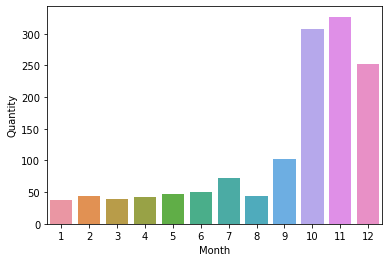

In [151]:
#Plot the Denied by month submitted
sns.barplot(x = 'Month', y= 'Quantity', data=denied_visas_gr_by_month_sub)

<AxesSubplot:xlabel='Month', ylabel='Quantity'>

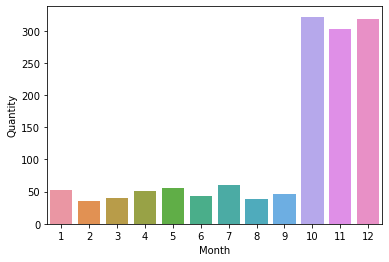

In [152]:
#Plot the Denied by month decision
sns.barplot(x = 'Month', y= 'Quantity', data=denied_visas_gr_by_month_dec)